In [1]:
import numpy as np
import os
from sklearn.svm import SVC
import pickle
import argparse
import sys
import pdb
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate

In [2]:
BASE_DIR = '/root/class/cmu/LSMA/ls-hw1'
DATA_DIR = '/shared/youngkim/dataset'
os.chdir(DATA_DIR)

class args:
    feat_dir = 'bof/'
    feat_dim = 50
    list_videos = os.path.join(DATA_DIR, 'labels/kfold_df.csv')
    output_file = 'models/mfcc-50.svm.multiclass.model'
    feat_appendix = '.csv'

In [3]:
df = pd.read_csv(args.list_videos)
len(df), df.head()

(7496,
                              Id  Category  kfold
 0  NjUzNjkxMTk0MzI5NDYwNTA2NA==         0    3.0
 1  LTcxNTE1MDY1Mjc5NzMxMTExNDI=         0    0.0
 2  NTMyNTQxODcwODc5MjU2NDk4NA==         0    3.0
 3  LTY0NjAxNjcyNTUyNDI5Mzc2MTE=         0    1.0
 4  NTgzMjc4Mzk0MjQwMzYyMjA1NQ==         0    1.0)

In [4]:
train_df = df[df.kfold != 4.0].copy().reset_index(drop=True)
train_df, len(train_df)

(                                Id  Category  kfold
 0     NjUzNjkxMTk0MzI5NDYwNTA2NA==         0    3.0
 1     LTcxNTE1MDY1Mjc5NzMxMTExNDI=         0    0.0
 2     NTMyNTQxODcwODc5MjU2NDk4NA==         0    3.0
 3     LTY0NjAxNjcyNTUyNDI5Mzc2MTE=         0    1.0
 4     NTgzMjc4Mzk0MjQwMzYyMjA1NQ==         0    1.0
 ...                            ...       ...    ...
 5992  NTcyMTgwOTU4NjUxMjE2NTIwMA==        14    0.0
 5993  LTUxMTQ5Mjg2OTQyNjgyMTc1NzA=        14    1.0
 5994  NDA2NjM0NDg5MDc3NzM3NjQ5OA==        14    0.0
 5995  LTEwMzgyODQzNTYwMjM5NDY3NzI=        14    0.0
 5996  LTQzOTI1MDQ1OTQ3NzUyMjQ4Mg==        14    3.0
 
 [5997 rows x 3 columns],
 5997)

In [5]:
val_df = df[df.kfold == 4.0].copy().reset_index(drop=True)
val_df, len(val_df)

(                                Id  Category  kfold
 0     LTc3NzAzMjA5ODk0ODc0OTQyNDI=         0    4.0
 1     MTY2MDM5NzQ4NTYyMDU5MDcxNA==         0    4.0
 2     LTc2MjMwNzM2OTM0NDg3NzM1Njk=         0    4.0
 3     NjIyOTQ3MTMyOTk4OTQyNDg3Mw==         0    4.0
 4     LTQ1NDc0MzE1MzIxOTU0NzYwMzg=         0    4.0
 ...                            ...       ...    ...
 1494  LTIxNzI4NzM0ODQwMTY3MzYzMjg=        14    4.0
 1495  Mjc4NDk1MTYyNjI1MTU2OTM5OA==        14    4.0
 1496  ODkzMDk5NjEzODg2Njk5MjY3OA==        14    4.0
 1497  LTcxMzIwMDY2OTM1MDM0OTgwMDI=        14    4.0
 1498  LTIwMTA2OTMzMjU2MzMyNzExMDA=        14    4.0
 
 [1499 rows x 3 columns],
 1499)

In [6]:
os.chdir(DATA_DIR)

train_feat_list, train_label_list = [], []

for video_id, label in zip(train_df.Id, train_df.Category):
    feat_filepath = os.path.join(args.feat_dir, video_id+args.feat_appendix)
    if os.path.exists(feat_filepath):
        train_feat_list.append(np.genfromtxt(feat_filepath, delimiter=";", dtype="float"))
        train_label_list.append(int(label))
    else:
        print(video_id)

In [7]:
train_y = np.array(train_label_list)
train_X = np.array(train_feat_list)

In [8]:
train_X.shape

(5997, 50)

In [9]:
val_feat_list, val_label_list = [], []

for video_id, label in zip(val_df.Id, val_df.Category):
    feat_filepath = os.path.join(args.feat_dir, video_id+args.feat_appendix)
    if os.path.exists(feat_filepath):
        val_feat_list.append(np.genfromtxt(feat_filepath, delimiter=";", dtype="float"))
        val_label_list.append(int(label))
    else:
        print(video_id)

val_y = np.array(val_label_list)
val_X = np.array(val_feat_list)

In [17]:
clf = SVC(cache_size=2000, decision_function_shape='ovr', kernel="rbf")
clf.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=2000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
val_pred = clf.predict(val_X)
print(f"prediction accuracy: {np.mean(val_pred == val_y):.4f}")

prediction accuracy: 0.3402


In [22]:
feat_list, label_list = [], []

for video_id, label in zip(df.Id, df.Category):
    feat_filepath = os.path.join(args.feat_dir, video_id+args.feat_appendix)
    if os.path.exists(feat_filepath):
        feat_list.append(np.genfromtxt(feat_filepath, delimiter=";", dtype="float"))
        label_list.append(int(label))
    else:
        print(video_id)

y = np.array(label_list)
X = np.array(feat_list)

In [24]:
clf = SVC(cache_size=2000, decision_function_shape='ovr', kernel="rbf")
scores = cross_val_score(clf, X, y, cv = 5)
scores


array([0.32266667, 0.31420947, 0.31354236, 0.33088726, 0.31821214])

In [26]:
result = pd.DataFrame(cross_validate(clf, X, y, cv =5))

In [27]:
result

,fit_time,score_time,test_score
0,2.248603,0.484305,0.322667
1,2.259047,0.482859,0.314209
2,2.236904,0.485077,0.313542
3,2.267325,0.485142,0.330887
4,2.231615,0.481330,0.318212


In [30]:
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(cache_size=2000, decision_function_shape='ovr', kernel="rbf")
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X, y)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
51,50.000,1.0,0.343782
43,25.000,1.0,0.341114
59,100.000,1.0,0.340447
35,10.000,1.0,0.335912
28,1.000,10.0,0.324306
...,...,...,...
14,0.010,50.0,0.143008
6,0.001,50.0,0.143008
23,0.100,100.0,0.100720
15,0.010,100.0,0.100720


In [33]:
result = result.sort_values(by='mean_test_score', ascending=False)
result[:10]

,C,gamma,mean_test_score
51,50.0,1.0,0.343782
43,25.0,1.0,0.341114
59,100.0,1.0,0.340447
35,10.0,1.0,0.335912
28,1.0,10.0,0.324306
58,100.0,0.1,0.320703
50,50.0,0.1,0.314433
29,1.0,25.0,0.309231
42,25.0,0.1,0.307496
36,10.0,10.0,0.307097


In [10]:
clf = SVC(cache_size=2000, decision_function_shape='ovr', kernel="rbf", C=50, gamma=1.0)
clf.fit(train_X, train_y)

SVC(C=50, break_ties=False, cache_size=2000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
from sklearn.metrics import confusion_matrix

val_pred = clf.predict(val_X)
print(f"prediction accuracy: {np.mean(val_pred == val_y):.4f}")
cf_matrix = confusion_matrix(val_y, val_pred)
cf_matrix


prediction accuracy: 0.3596


array([[51,  0, 14,  7,  3,  0,  0,  1,  1,  2,  2,  7,  3,  1,  8],
       [ 0, 33,  1,  4,  7,  7, 20,  3,  0,  3,  2,  9,  1,  9,  1],
       [ 9,  1, 25, 12,  7,  4,  3,  2,  1,  4,  3,  9,  4,  5, 10],
       [12,  8, 11, 23,  9,  3, 11,  2,  1,  5,  0,  6,  2,  1,  6],
       [ 4, 10,  6,  5, 32,  4, 12,  1,  2,  4,  2, 13,  2,  1,  2],
       [ 3,  3,  7,  3,  7, 33,  7,  5, 11,  3,  1, 10,  3,  4,  0],
       [ 3,  9,  1,  4,  5,  5, 43,  5,  9,  3,  3,  4,  3,  3,  0],
       [ 2,  6,  1,  3,  4,  3, 16, 18, 15, 14,  1, 10,  6,  1,  0],
       [ 4,  6,  3,  1,  1,  5,  7,  5, 42,  8,  1,  2,  4,  9,  2],
       [ 5,  4,  2,  4,  5,  4, 14,  1,  7, 32,  5,  4, 11,  0,  2],
       [ 2,  0,  3,  3,  1,  1,  4,  0,  3,  7, 66,  2,  4,  0,  4],
       [ 3,  8,  7,  8,  3,  5,  8,  3,  9,  2,  3, 33,  2,  2,  4],
       [10,  5,  3,  6,  7,  2,  7,  4,  6, 12,  4,  2, 28,  1,  3],
       [ 4,  8,  3,  3,  4,  8,  7,  1, 11,  2,  2,  5,  7, 33,  2],
       [13,  2,  9,  9,  4,  2,  1

<AxesSubplot:>

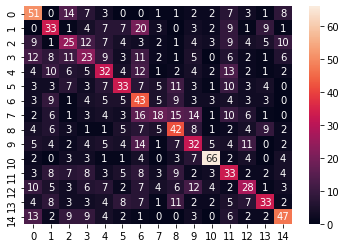

In [12]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [13]:
args.output_file = 'models/mfcc50.svm.best.model'
pickle.dump(clf, open(args.output_file, 'wb'))